In [1]:
!pip install -r requirements.txt --quiet

In [2]:
import os
import shutil

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from watermark import watermark

Download and unzip test data from our Zenodo repository

In [3]:
# !pip install wget

In [4]:
# import wget
# wget.download('https://zenodo.org/record/7673199/files/Results_24h.zip?download=1')

In [5]:
# !mkdir Results_test

In [6]:
# shutil.unpack_archive("Results_24h.zip", "Results_test/")

In [7]:
# @title
def visSets(set1: list, set2: list, csvpath: str) -> [DataFrame, DataFrame]:
    """
    Visualize sets of data from csv files in a given directory

    Parameters:
    set1 (list): List of strings indicating well names for set 1
    set2 (list): List of strings indicating well names for set 2
    csvpath (str): Path to directory containing csv files

    Returns:
    Tuple: A tuple of two pandas dataframes, containing data from well_set1 and well_set2 respectively

    """
    dir_list = os.listdir(csvpath)
    print("Files and directories in '", path, "' :")

    well_set1 = pd.DataFrame()
    well_set2 = pd.DataFrame()

    # read csv of set 1
    for well in set1:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set1 = pd.concat([well_set1, csv_set])

    # read csv of set 2
    for well in set2:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set2 = pd.concat([well_set2, csv_set])

    return well_set1, well_set2

In [8]:
# @title
def pltoSet1(B23: DataFrame):
    """
    This function creates a box plot using the Seaborn library. It takes a pandas DataFrame as input
    and visualizes the distribution of "Mean" values for different "Well" categories.
    The plot is created with a logarithmic x axis, horizontal boxes and grid lines for the x axis.
    The y axis is labeled with "Mean".

    Parameters:
    B23 (pd.DataFrame): A pandas DataFrame with columns "Well" and "Mean".

    Returns:
    None
    """
    sns.set_theme(style="ticks")

    # Initialize the figure
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot
    sns.boxplot(
        x="Well",
        y="Mean",
        data=B23,
        width=0.6,
        palette="vlag",
        showfliers=False,
    )

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.despine(trim=True, left=True)

In [9]:
# @title
def norm_test(data: list, name: str):
    """
    Performs a normality test on a given data sample and returns a conclusion on whether the data is from a normal distribution.

    Inputs:
    data (list): A list of numerical values representing the data sample
    name (str): A string that represents the name of the data sample

    Outputs:
    None

    Side effects:
    Prints the p-value and the conclusion of the normality test on the data sample.

    Example:
    >>> norm_test([1, 2, 3, 4, 5], "Sample Data")
    p = 0.157298
    null hypothesis: Sample Data comes from a normal distribution
    The null hypothesis cannot be rejected
    """
    k2, p = normaltest(data)
    alpha = 1e-3
    print("p = {:g}".format(p))
    print("null hypothesis: {} comes from a normal distribution".format(name))
    if p < alpha:  # null hypothesis: Data from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    print("")

In [10]:
# @title
def visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):
    """
    visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):

    This function generates visualization of statistics between two sets of data and saves the figure to current path.

    set1: list
    A list of strings containing the name of each well in the first set.
    set2: list
    A list of strings containing the name of each well in the second set.
    path: str
    The path to the directory where the figure will be saved.
    stat_text: str
    The text to be added to the plot as a title or subtitle.
    fig_name: str
    The name of the figure file to be saved.

    Returns: None
    """

    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Well"].describe()

    well_set2["Set"] = 2
    well_set2["Well"].describe()

    pltoSet1(well_set1)
    pltoSet1(well_set2)

    print("Statistics:")
    print("")

    csv_all = pd.concat([well_set1, well_set2])

    sns.set_theme(style="ticks")

    # Initialize the figure
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot
    sns.boxplot(
        x="Well",
        y="Mean",
        data=csv_all,
        width=0.6,
        hue="Set",
        palette=["m", "g"],
    )

    # Tweak the visual presentation
    # ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # sns.despine(trim=True, left=True)

    for well in set1:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    for well in set2:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    # pvalues with scipy:
    stat_results = [
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
    ]

    pvalues = [result.pvalue for result in stat_results]
    print(pvalues)

    pairs = [
        (set1[0], set2[0]),
        (set1[0], set2[1]),
        (set1[0], set2[2]),
        (set1[1], set2[0]),
        (set1[1], set2[1]),
        (set1[1], set2[2]),
        (set1[2], set2[0]),
        (set1[2], set2[1]),
        (set1[2], set2[2]),
    ]

    formatted_pvalues = [f"p={p:.2e}" for p in pvalues]

    for p in pvalues:
        print(p)

    # prepare plots
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)
    states_palette = sns.color_palette("YlGnBu", n_colors=5)

    cmap = sns.color_palette("colorblind")
    plotting_parameters = {
        "data": csv_all,
        "x": "Well",
        "y": "Mean",
        "showfliers": False,
        "width": 0.6,
        #'hue':"Set",
        "palette": [cmap[0], cmap[1], cmap[4], cmap[0], cmap[1], cmap[4]],
    }

    # show results
    with sns.plotting_context("notebook", font_scale=1.4):
        # Create new plot
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))

        # Plot with seaborn
        sns.boxplot(**plotting_parameters)

        # Add annotations
        annotator = Annotator(ax, pairs, **plotting_parameters)
        ## p values
        # annotator.set_custom_annotations(formatted_pvalues)
        # annotator.annotate()

        ## <> p values
        annotator.configure(text_format="simple")
        annotator.set_pvalues(pvalues).annotate()

        # Label and show
        plt.title(stat_text, y=1.06)

        plt.savefig("./" + fig_name + ".png", bbox_inches="tight")
        plt.show()

In [11]:
# create an Empty DataFrame object
df = pd.DataFrame()

# append columns to an empty DataFrame
df["Set"] = []
df["Well"] = []
df["Mean"] = []
df["Mean_25"] = []
df["Mean_75"] = []
df["Median"] = []
df["Median_25"] = []
df["Median_75"] = []
df["Area"] = []
df["Area_25"] = []
df["Area_75"] = []
df["MoA"] = []

print(df)

Empty DataFrame
Columns: [Set, Well, Mean, Mean_25, Mean_75, Median, Median_25, Median_75, Area, Area_25, Area_75, MoA]
Index: []


# Data input setup

`path` to saved .csv files

In [12]:
path = "Results_24h_final/"

list of .csv files:

In [13]:
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
for file in dir_list:
    print(file)

Files and directories in ' Results_24h_final/ ' :
B2_AllResults_2023-2-20_Results.csv
B3_AllResults_2023-2-20_Results.csv
B4_AllResults_2023-2-20_Results.csv
B6_AllResults_2023-2-20_Results.csv
B7_AllResults_2023-2-20_Results.csv
B8_AllResults_2023-2-20_Results.csv
C2_AllResults_2023-2-20_Results.csv
C3_AllResults_2023-2-20_Results.csv
C4_AllResults_2023-2-20_Results.csv
C6_AllResults_2023-2-20_Results.csv
C7_AllResults_2023-2-20_Results.csv
C8_AllResults_2023-2-20_Results.csv
D2_AllResults_2023-2-20_Results.csv
D3_AllResults_2023-2-20_Results.csv
D4_AllResults_2023-2-20_Results.csv
D6_AllResults_2023-2-20_Results.csv
D7_AllResults_2023-2-20_Results.csv
D8_AllResults_2023-2-20_Results.csv


Set up for controll, state wells and set name:

`vis_name` is tag for naming output images. They will be in form of *vis_name*_restOfImageName.

In [14]:
vis_name = "WellvsNorm"

In [15]:
set1c = ["B4", "C4", "D4"]  # kontrola
set1c_name = "CHOK1"

Set up for treatment, state wells and name for each set:

In [16]:
set2t = [
    ["B2", "C2", "D2"],  # 1
    ["B3", "C3", "D3"],  # 2
    ["B6", "C6", "D6"],  # 3
    ["B7", "C7", "D7"],  # 4
    # ["B2", "C2", "D2"],  # 5
    # ["B3", "C3", "D3"],  # 6
    # ["B6", "C6", "D6"],  # 7
    # ["B7", "C7", "D7"],  # 8
]

set2t_name = [
    "CHOK1 Val30",
    "CHOK1 Val15",
    "HeLa Val30",
    "HeLa Val15",
    # "CHOK1 Val30",
    # "CHOK1 Val15",
    # "HeLa Val30",
    # "HeLa Val15",
]
if len(set2t_name) == len(set2t):
    print("Set up complete")
else:
    print("Unequal set of wells and names")

Set up complete


## Proces data

0
Files and directories in ' Results_24h_final/ ' :
Control
stats
Files and directories in ' Results_24h_final/ ' :
Mean Brigthnes
Set1
1.5175330319658564
Set2
B2, 2.891929006451613
C2, 2.747479475
D2, 2.741327022708158
Mean Area
Set1
2.185836373392589
Set2
B2, 0.9049268157180608
C2, 0.9059224460481728
D2, 0.8754109446900233
--Mean/Area--
Set1
0.6942573792065353
Set2
3.195760094872272
3.0327976605338485
3.131474468461029
Fold: 4.5105382560571154
Files and directories in ' Results_24h_final/ ' :
Statistics:

p = 0
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 3.83985e-91
null hypothesis: B2 comes from a normal distribution
The null hypothesis can be rejected

p = 3.65029e-132
null hypothesis: C2 comes from a normal distribution
The null hypothesis can

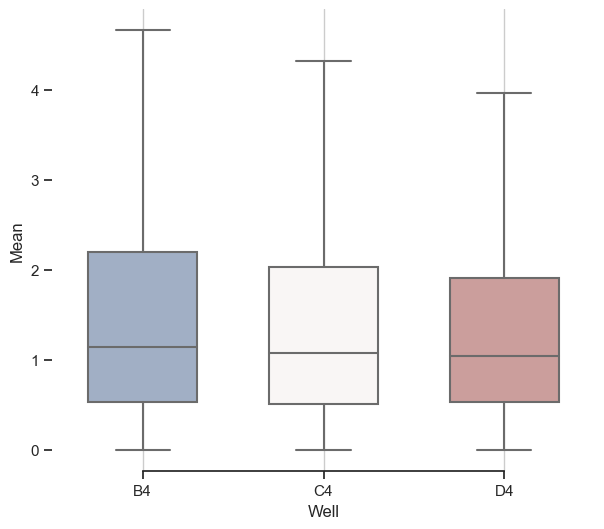

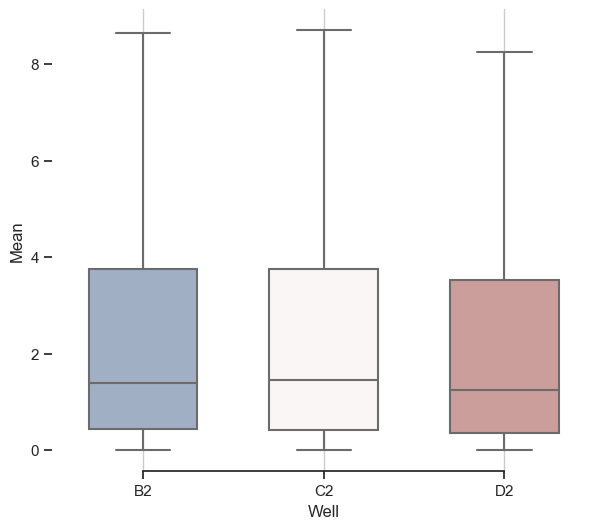

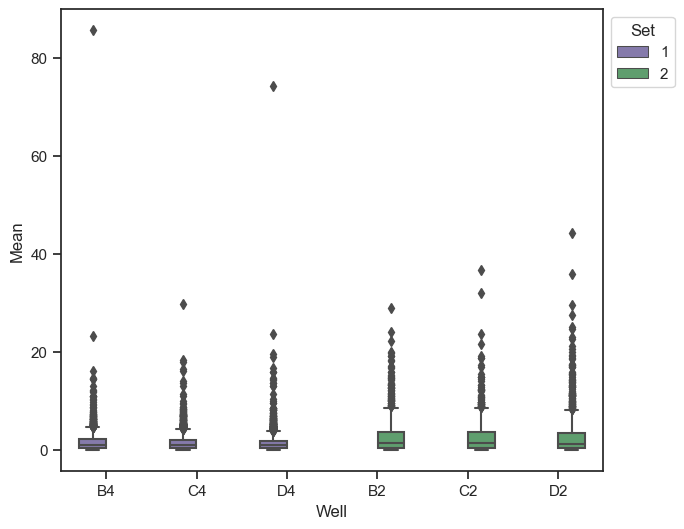

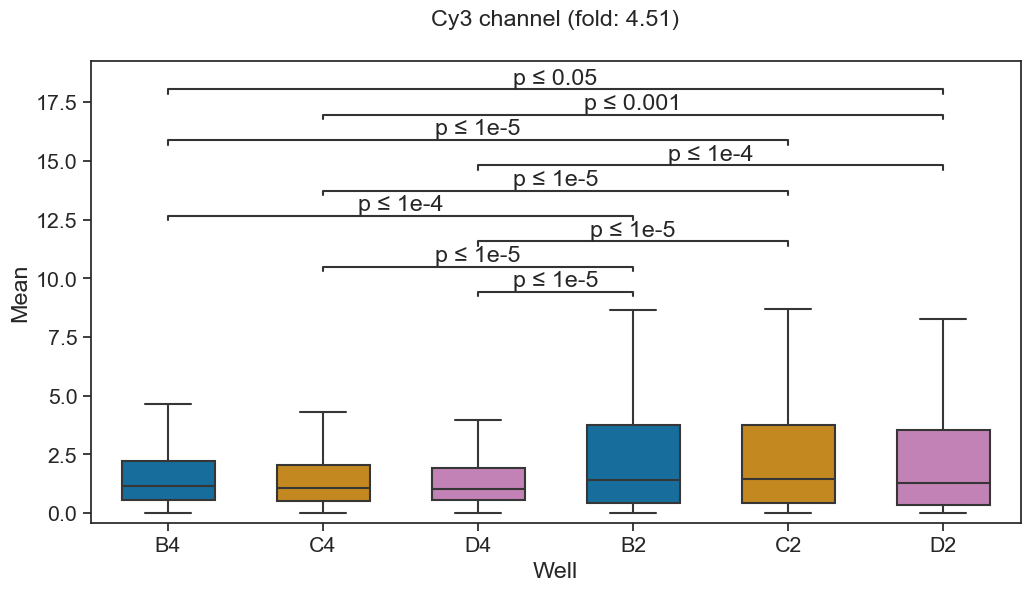

1
Files and directories in ' Results_24h_final/ ' :
Control
stats
Files and directories in ' Results_24h_final/ ' :
Mean Brigthnes
Set1
1.5175330319658564
Set2
B3, 2.771359568788501
C3, 2.5587474667511083
D3, 2.5277546585998274
Mean Area
Set1
2.185836373392589
Set2
B3, 1.162851478875268
C3, 1.1259014114283399
D3, 1.245662674553599
--Mean/Area--
Set1
0.6942573792065353
Set2
2.383244652592275
2.272621244434744
2.0292449233944367
Fold: 2.922900042796311
Files and directories in ' Results_24h_final/ ' :
Statistics:

p = 0
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 3.89979e-107
null hypothesis: B3 comes from a normal distribution
The null hypothesis can be rejected

p = 2.97402e-177
null hypothesis: C3 comes from a normal distribution
The null hypothes

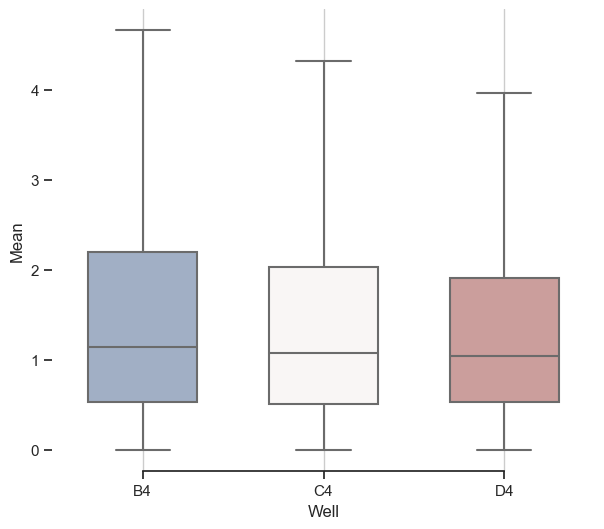

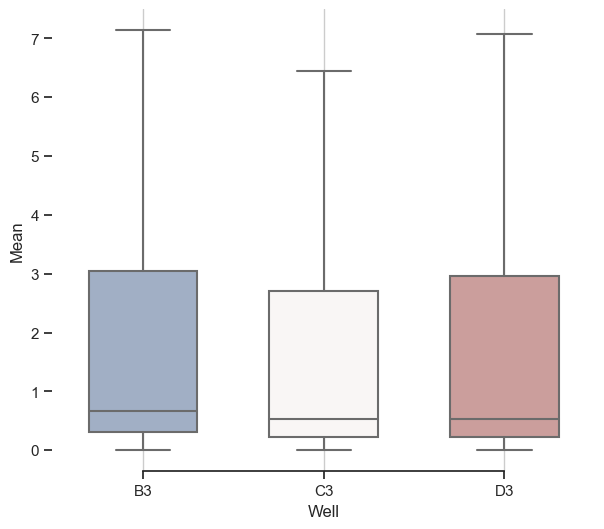

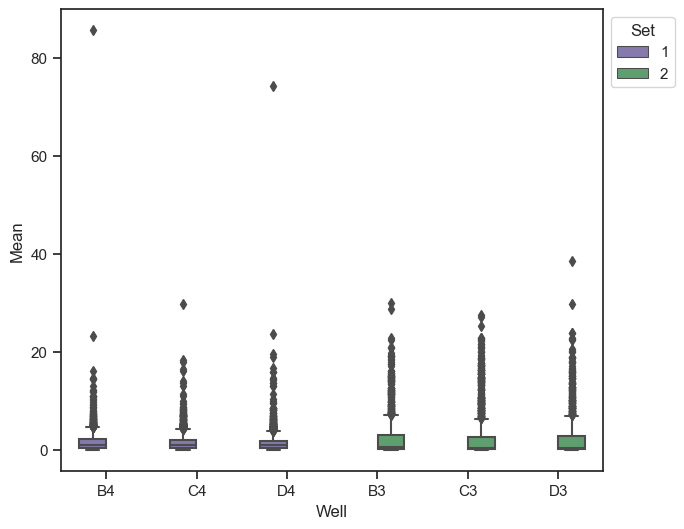

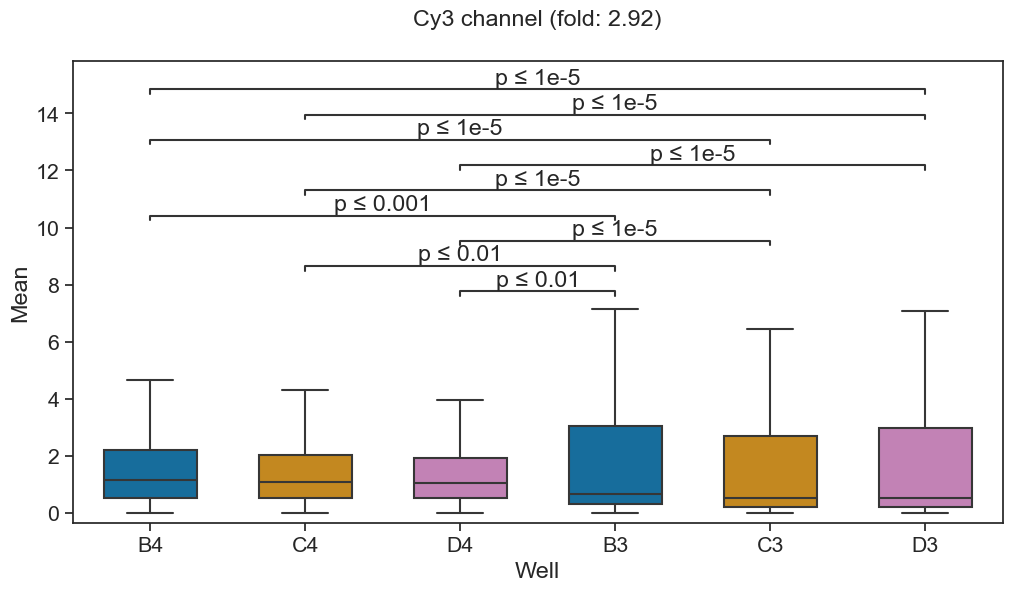

2
Files and directories in ' Results_24h_final/ ' :
Control
stats
Files and directories in ' Results_24h_final/ ' :
Mean Brigthnes
Set1
1.5175330319658564
Set2
B6, 0.4768620019772615
C6, 0.6586967
D6, 0.6731630833833233
Mean Area
Set1
2.185836373392589
Set2
B6, 2.125113648474684
C6, 2.0282306663677505
D6, 2.0452391195419564
--Mean/Area--
Set1
0.6942573792065353
Set2
0.22439364705013903
0.32476419517885735
0.32913661632586133
Fold: 0.47408443350221297
Files and directories in ' Results_24h_final/ ' :
Statistics:

p = 0
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: B6 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C6 comes from a normal distribution
The null hypothesis can be rejected

p 

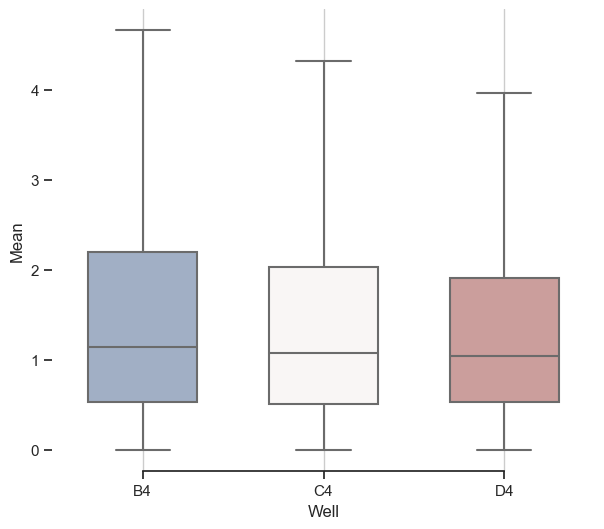

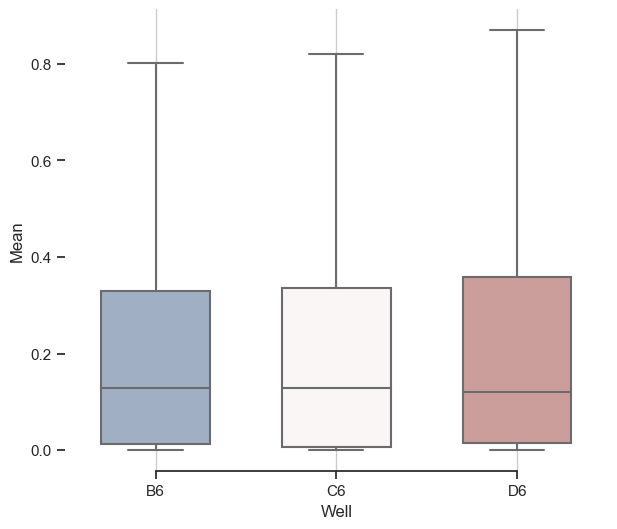

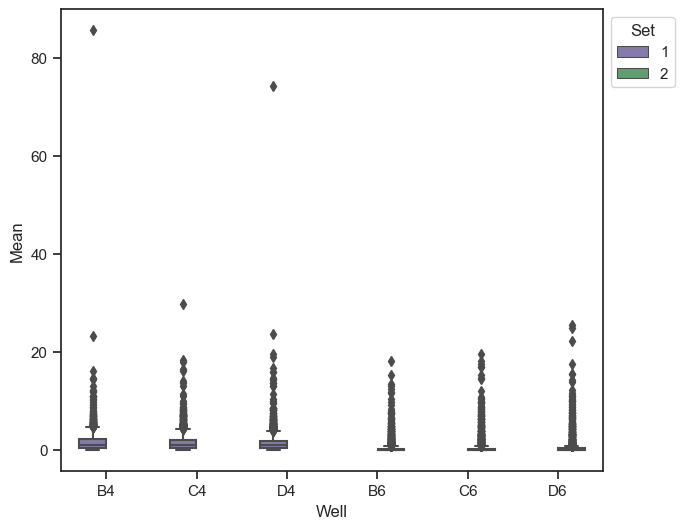

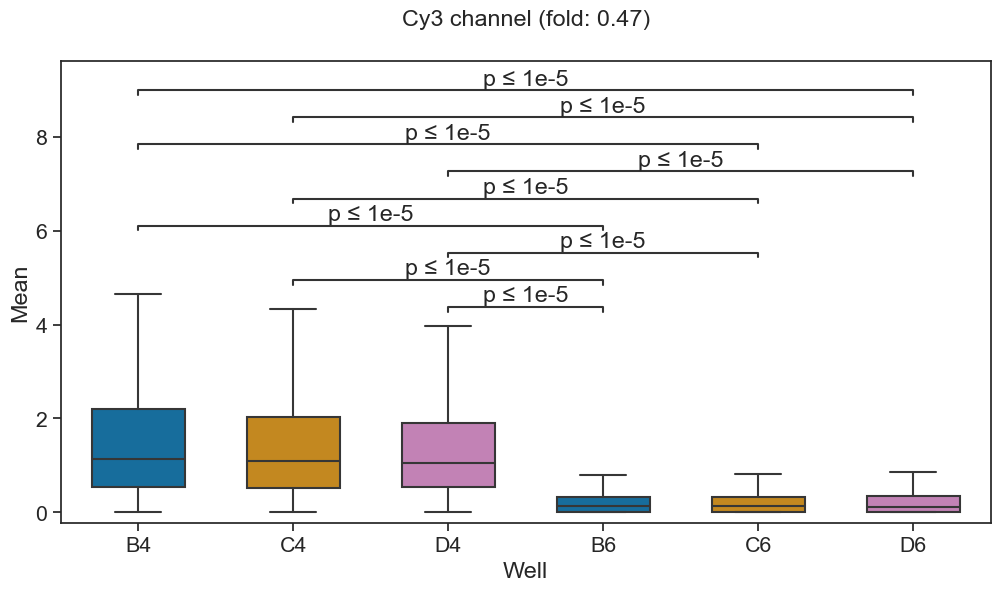

3
Files and directories in ' Results_24h_final/ ' :
Control
stats
Files and directories in ' Results_24h_final/ ' :
Mean Brigthnes
Set1
1.5175330319658564
Set2
B7, 0.4198224457892083
C7, 0.3437602994599902
D7, 0.31311194247996227
Mean Area
Set1
2.185836373392589
Set2
B7, 2.245101516431577
C7, 2.233307294653771
D7, 2.2049047259173244
--Mean/Area--
Set1
0.6942573792065353
Set2
0.18699486090788672
0.15392431676684387
0.14200701681098524
Fold: 0.20454520335568438
Files and directories in ' Results_24h_final/ ' :
Statistics:

p = 0
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: B7 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C7 comes from a normal distribution
The null hypothesis can be rej

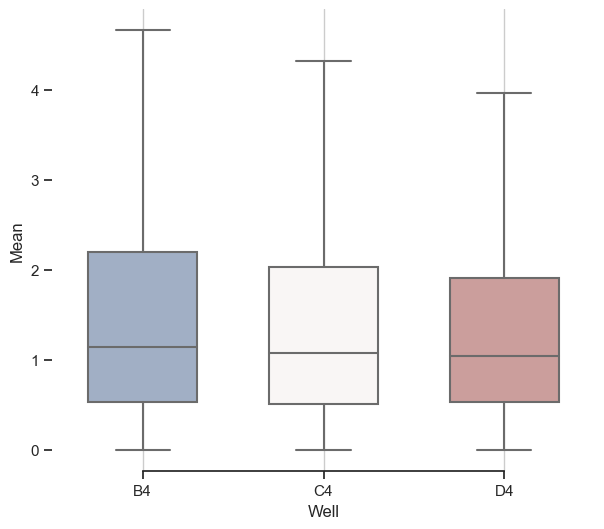

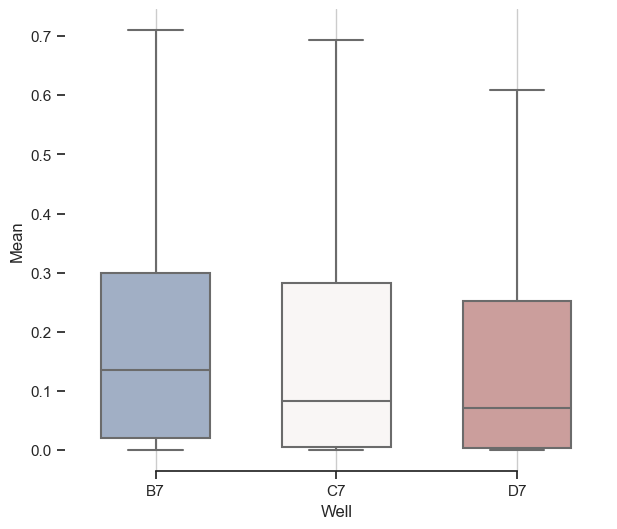

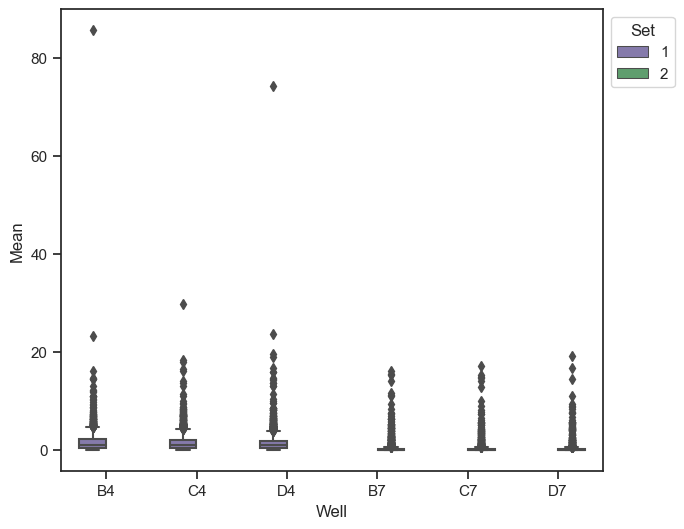

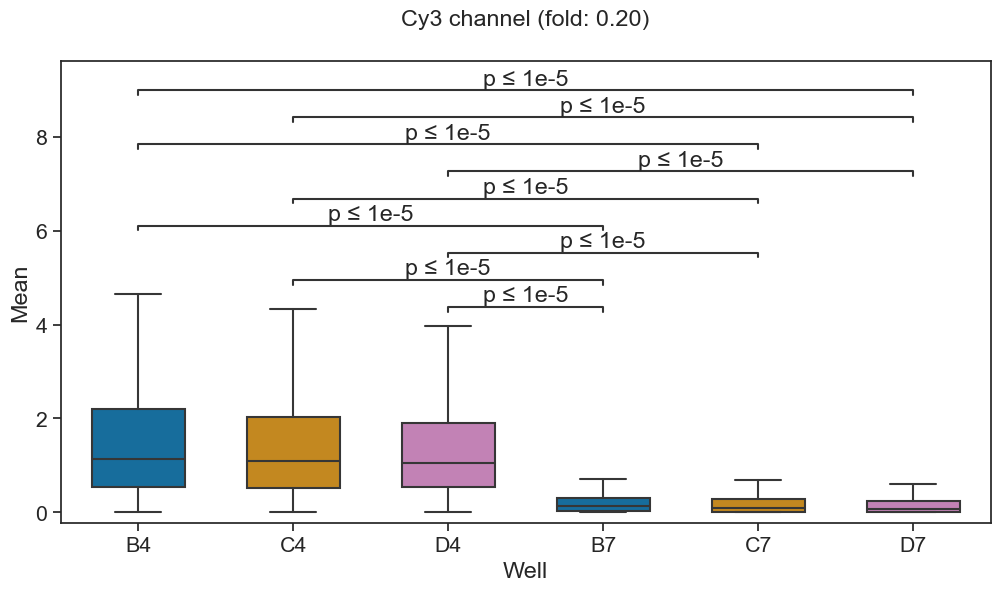

In [17]:
for s in range(len(set2t_name)):
    # s=0

    well_set1 = pd.DataFrame()
    well_set2 = pd.DataFrame()
    print(s)

    # get set of wells and names based on setup
    set1 = set1c
    set1_name = set1c_name
    set2 = set2t[s]
    set2_name = set2t_name[s]

    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Set_name"] = set1_name
    well_set1.Mean.describe()

    well_set2["Set"] = 2
    well_set2["Set_name"] = set2_name
    well_set2.Mean.describe()

    print("Control")
    sns.set_theme(style="ticks")

    # Initialize the figure
    #     f, ax = plt.subplots(figsize=(7, 6))

    #     # Plot
    #     sns.boxplot(
    #         x="Well",
    #         y="Mean",
    #         data=well_set1,
    #         width=0.6,
    #         palette="vlag",
    #         showfliers=False,
    #     )

    #     # Tweak the visual presentation
    #     ax.xaxis.grid(True)
    #     ax.set(ylabel="Mean")
    #     sns.despine(trim=True, left=True)

    print("stats")
    well_set1, well_set2 = visSets(set1, set2, path)

    ####!!!!correct worng pixel size, comment out if ours is correct in metadata!!!!
    well_set1["Area"] = (well_set1["Area"] / 0.0104167) * (0.65 * 0.65)
    well_set2["Area"] = (well_set2["Area"] / 0.0104167) * (0.65 * 0.65)

    # Controll
    well_set1["Set"] = 1
    well_set1["Well"].describe()
    well_set1["Well"].unique().tolist()

    # Treatment
    well_set2["Set"] = 2
    well_set2["Well"].describe()
    wells = well_set2["Well"].unique().tolist()

    print("Mean Brigthnes")
    print("Set1")
    print(well_set1["Mean"].mean())
    print("Set2")
    for uWell in wells:
        sel_well_set2 = well_set2[well_set2["Well"] == uWell]
        print("{}, {}".format(uWell, sel_well_set2["Mean"].mean()))

    print("Mean Area")
    print("Set1")
    print(well_set1["Area"].mean())
    print("Set2")
    for uWell in wells:
        sel_well_set2 = well_set2[well_set2["Well"] == uWell]
        print("{}, {}".format(uWell, sel_well_set2["Area"].mean()))

    new_row = {
        "Set": set1_name,
        "Well": "".join((well_set1["Well"].unique().tolist())),
        "Mean": well_set1["Mean"].mean(),
        "Mean_25": well_set1["Mean"].quantile(q=0.25),
        "Mean_75": well_set1["Mean"].quantile(q=0.75),
        "Median": well_set1["Mean"].median(),
        "Median_25": well_set1["Mean"].quantile(q=0.25),
        "Median_75": well_set1["Mean"].quantile(q=0.75),
        "Area": well_set1["Area"].mean(),
        "Area_25": well_set1["Area"].quantile(q=0.25),
        "Area_75": well_set1["Area"].quantile(q=0.75),
        "MoA": well_set1["Mean"].mean() / well_set1["Area"].mean(),
    }
    # df = df.append(new_row, ignore_index=True)
    df.loc[len(df.index)] = new_row
    # # new_row = {'Set':"".join(set2), 'Mean':well_set2["Mean"].mean(), 'Median':well_set2["Area"].median(), 'Area':well_set2["Area"].mean(), 'MoA': well_set2["Mean"].mean()/well_set2["Area"].mean()}
    for uWell in wells:
        sel_well_set2 = well_set2[well_set2["Well"] == uWell]
        new_row = {
            "Set": set2_name,
            "Well": uWell,
            "Mean": sel_well_set2["Mean"].mean(),
            "Mean_25": sel_well_set2["Mean"].quantile(q=0.25),
            "Mean_75": sel_well_set2["Mean"].quantile(q=0.75),
            "Median": sel_well_set2["Mean"].median(),
            "Median_25": sel_well_set2["Mean"].quantile(q=0.25),
            "Median_75": sel_well_set2["Mean"].quantile(q=0.75),
            "Area": sel_well_set2["Area"].mean(),
            "Area_25": sel_well_set2["Area"].quantile(q=0.25),
            "Area_75": sel_well_set2["Area"].quantile(q=0.75),
            "MoA": sel_well_set2["Mean"].mean() / sel_well_set2["Area"].mean(),
        }
        # df = df.append(new_row, ignore_index=True)
        df.loc[len(df.index)] = new_row

    print("--Mean/Area--")
    print("Set1")
    m2a1 = well_set1["Mean"].mean() / well_set1["Area"].mean()
    print(m2a1)
    print("Set2")
    for uWell in wells:
        sel_well_set2 = well_set2[well_set2["Well"] == uWell]
        m2a2 = sel_well_set2["Mean"].mean() / sel_well_set2["Area"].mean()
        print(m2a2)

    print("Fold: {}".format(m2a2 / m2a1))

    visStats(
        set1,
        set2,
        path,
        "Cy3 channel (fold: {:.2f})".format(m2a2 / m2a1),
        vis_name + "_" + "".join(set1) + "".join(set2),
    )

## Output data table

In [18]:
df

,Set,Well,Mean,Mean_25,Mean_75,Median,Median_25,Median_75,Area,Area_25,Area_75,MoA
0,CHOK1,B4C4D4,1.517533,0.528740,2.038190,1.083710,0.528740,2.038190,2.185836,1.267496,2.240122,0.694257
1,CHOK1 Val30,B2,2.891929,0.434250,3.751505,1.385870,0.434250,3.751505,0.904927,0.655853,1.025354,3.195760
2,CHOK1 Val30,C2,2.747479,0.423528,3.746415,1.454615,0.423528,3.746415,0.905922,0.655853,1.075039,3.032798
3,CHOK1 Val30,D2,2.741327,0.358160,3.529070,1.258180,0.358160,3.529070,0.875411,0.629489,1.029815,3.131474
4,CHOK1,B4C4D4,1.517533,0.528740,2.038190,1.083710,0.528740,2.038190,2.185836,1.267496,2.240122,0.694257
5,CHOK1 Val15,B3,2.771360,0.309273,3.044575,0.660630,0.309273,3.044575,1.162851,0.774694,1.320224,2.383245
6,CHOK1 Val15,C3,2.558747,0.223670,2.714080,0.522880,0.223670,2.714080,1.125901,0.732714,1.317993,2.272621
7,CHOK1 Val15,D3,2.527755,0.225990,2.963710,0.525860,0.225990,2.963710,1.245663,0.818498,1.417162,2.029245
8,CHOK1,B4C4D4,1.517533,0.528740,2.038190,1.083710,0.528740,2.038190,2.185836,1.267496,2.240122,0.694257
9,HeLa Val30,B6,0.476862,0.012175,0.329620,0.129110,0.012175,0.329620,2.125114,1.632940,2.425075,0.224394


## Results
The distributions of Mean Brightness from ROIs (MBR) do not have normal distribution (that can be partialy because the objects are close). So we should use MBR distribution median. In next table is MBR median, its Inter Quantile Range (IGR), and the same for MBR Mean. Area is in µm^2

In [19]:
df["Mean_IQR"] = df["Mean_75"] - df["Mean_25"]
df["Median_IQR"] = df["Median_75"] - df["Median_25"]
df["Area_IQR"] = df["Area_75"] - df["Area_25"]
df["MDoa"] = df["Median"] / df["Area"]
df.rename(columns={"Mean": "MFV"}, inplace=True)
df.rename(columns={"Mean_IQR": "MFV_IQR"}, inplace=True)
df2 = df[
    [
        "Set",
        "Well",
        "MFV",
        "MFV_IQR",
        # "Median",
        # "Median_IQR",
        "Area",
        "Area_IQR",
        "MoA",
        # "MDoa",
    ]
]
df2

,Set,Well,MFV,MFV_IQR,Area,Area_IQR,MoA
0,CHOK1,B4C4D4,1.517533,1.509450,2.185836,0.972626,0.694257
1,CHOK1 Val30,B2,2.891929,3.317255,0.904927,0.369500,3.195760
2,CHOK1 Val30,C2,2.747479,3.322888,0.905922,0.419186,3.032798
3,CHOK1 Val30,D2,2.741327,3.170910,0.875411,0.400326,3.131474
4,CHOK1,B4C4D4,1.517533,1.509450,2.185836,0.972626,0.694257
5,CHOK1 Val15,B3,2.771360,2.735302,1.162851,0.545530,2.383245
6,CHOK1 Val15,C3,2.558747,2.490410,1.125901,0.585279,2.272621
7,CHOK1 Val15,D3,2.527755,2.737720,1.245663,0.598664,2.029245
8,CHOK1,B4C4D4,1.517533,1.509450,2.185836,0.972626,0.694257
9,HeLa Val30,B6,0.476862,0.317445,2.125114,0.792134,0.224394


### Renaming of Columns

In [20]:
newSet = "newSet"
newMFV = "newMFV"
newMFV_IQR = "newMFV_IQR"
newArea = "newArea"
newArea_IQR = "newArea_IQR"
newMoA = "newMoA"


df2.rename(
    columns={
        "Set": newSet,
        "MFV": newMFV,
        "MFV_IQR": newMFV_IQR,
        "Area": newArea,
        "Area_IQR": newArea_IQR,
        "MoA": newMoA,
    }
)

,newSet,Well,newMFV,newMFV_IQR,newArea,newArea_IQR,newMoA
0,CHOK1,B4C4D4,1.517533,1.509450,2.185836,0.972626,0.694257
1,CHOK1 Val30,B2,2.891929,3.317255,0.904927,0.369500,3.195760
2,CHOK1 Val30,C2,2.747479,3.322888,0.905922,0.419186,3.032798
3,CHOK1 Val30,D2,2.741327,3.170910,0.875411,0.400326,3.131474
4,CHOK1,B4C4D4,1.517533,1.509450,2.185836,0.972626,0.694257
5,CHOK1 Val15,B3,2.771360,2.735302,1.162851,0.545530,2.383245
6,CHOK1 Val15,C3,2.558747,2.490410,1.125901,0.585279,2.272621
7,CHOK1 Val15,D3,2.527755,2.737720,1.245663,0.598664,2.029245
8,CHOK1,B4C4D4,1.517533,1.509450,2.185836,0.972626,0.694257
9,HeLa Val30,B6,0.476862,0.317445,2.125114,0.792134,0.224394


In [21]:
df2.to_csv("results.csv", sep=";")

All data are formated with Tab, so they can be easily copy pased to any table processor as MS Excel.

### Mean of Mean Brightness

In [22]:
# create an Empty DataFrame object
foldMean = pd.DataFrame()

# append columns to an empty DataFrame
foldMean["Set"] = []
foldMean["Well"] = []
foldMean["Fold"] = []

print("Fold based on MBR mean:")
for i in range(0, len(df), 4):
    for l in range(1, 4, 1):
        print(
            df.iloc[i + l].Set
            + ", "
            + df.iloc[i + l].Well
            + " over "
            + df.iloc[i].Set
            + ", \t fold: \t {}".format(df.iloc[i + l].MoA / df.iloc[i].MoA)
        )
        new_row = {
            "Set": df.iloc[i + l].Set,
            "Well": df.iloc[i + l].Well,
            "Fold": df.iloc[i + l].MoA / df.iloc[i].MoA,
        }
        # foldMean = foldMean.append(new_row, ignore_index=True)
        foldMean.loc[len(foldMean.index)] = new_row

Fold based on MBR mean:
CHOK1 Val30, B2 over CHOK1, 	 fold: 	 4.603134501104903
CHOK1 Val30, C2 over CHOK1, 	 fold: 	 4.36840536574494
CHOK1 Val30, D2 over CHOK1, 	 fold: 	 4.5105382560571154
CHOK1 Val15, B3 over CHOK1, 	 fold: 	 3.432797005796435
CHOK1 Val15, C3 over CHOK1, 	 fold: 	 3.273456375835884
CHOK1 Val15, D3 over CHOK1, 	 fold: 	 2.922900042796311
HeLa Val30, B6 over CHOK1, 	 fold: 	 0.3232139171593651
HeLa Val30, C6 over CHOK1, 	 fold: 	 0.4677864505380258
HeLa Val30, D6 over CHOK1, 	 fold: 	 0.47408443350221297
HeLa Val15, B7 over CHOK1, 	 fold: 	 0.2693451542734808
HeLa Val15, C7 over CHOK1, 	 fold: 	 0.22171073924019866
HeLa Val15, D7 over CHOK1, 	 fold: 	 0.20454520335568438


In [23]:
foldMean

,Set,Well,Fold
0,CHOK1 Val30,B2,4.603135
1,CHOK1 Val30,C2,4.368405
2,CHOK1 Val30,D2,4.510538
3,CHOK1 Val15,B3,3.432797
4,CHOK1 Val15,C3,3.273456
5,CHOK1 Val15,D3,2.922900
6,HeLa Val30,B6,0.323214
7,HeLa Val30,C6,0.467786
8,HeLa Val30,D6,0.474084
9,HeLa Val15,B7,0.269345


In [24]:
# create an Empty DataFrame object
foldMeanIQR = pd.DataFrame()

# append columns to an empty DataFrame
foldMeanIQR["Set"] = []
foldMeanIQR["Fold Median"] = []
foldMeanIQR["Fold IQR"] = []

print("Fold based on MBR mean:")
uSet = foldMean["Set"].unique().tolist()

for iSet in uSet:
    well_set1 = foldMean[foldMean["Set"] == iSet]
    new_row = {
        "Set": iSet,
        "Fold Median": well_set1["Fold"].quantile(q=0.5),
        "Fold IQR": well_set1["Fold"].quantile(q=0.75)
        - well_set1["Fold"].quantile(q=0.25),
    }
    foldMeanIQR.loc[len(foldMeanIQR.index)] = new_row
    print(iSet)
    print("mean: {}".format(well_set1["Fold"].quantile(q=0.5)))
    print(
        "IQR: {}".format(
            well_set1["Fold"].quantile(q=0.75) - well_set1["Fold"].quantile(q=0.25)
        )
    )

Fold based on MBR mean:
CHOK1 Val30
mean: 4.5105382560571154
IQR: 0.11736456767998149
CHOK1 Val15
mean: 3.273456375835884
IQR: 0.2549484815000618
HeLa Val30
mean: 0.4677864505380258
IQR: 0.07543525817142394
HeLa Val15
mean: 0.22171073924019866
IQR: 0.03239997545889822


In [25]:
foldMeanIQR

,Set,Fold Median,Fold IQR
0,CHOK1 Val30,4.510538,0.117365
1,CHOK1 Val15,3.273456,0.254948
2,HeLa Val30,0.467786,0.075435
3,HeLa Val15,0.221711,0.032400


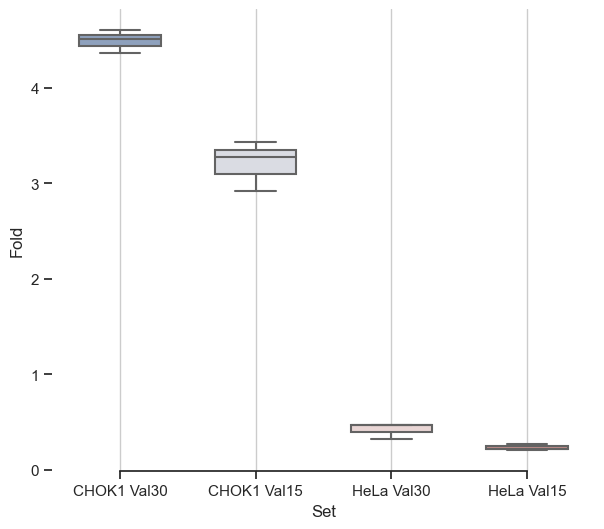

In [26]:
# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))

# Plot
sns.boxplot(
    x="Set",
    y="Fold",
    data=foldMean,
    width=0.6,
    palette="vlag",
    showfliers=False,
)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Fold")
sns.despine(trim=True, left=True)

### Median of Mean Brightness

In [27]:
# create an Empty DataFrame object
foldMedian = pd.DataFrame()

# append columns to an empty DataFrame
foldMedian["Set"] = []
foldMedian["Well"] = []
foldMedian["Fold"] = []

print("Fold based on MBR median:")
for i in range(0, len(df), 4):
    for l in range(1, 4, 1):
        print(
            df.iloc[i + l].Set
            + ", "
            + df.iloc[i + l].Well
            + " over "
            + df.iloc[i].Set
            + ", \t fold: \t {}".format(df.iloc[i + l].MDoa / df.iloc[i].MDoa)
        )
        new_row = {
            "Set": df.iloc[i + l].Set,
            "Well": df.iloc[i + l].Well,
            "Fold": df.iloc[i + l].MDoa / df.iloc[i].MDoa,
        }
        # foldMean = foldMean.append(new_row, ignore_index=True)
        foldMedian.loc[len(foldMedian.index)] = new_row

Fold based on MBR median:
CHOK1 Val30, B2 over CHOK1, 	 fold: 	 3.0889693814925576
CHOK1 Val30, C2 over CHOK1, 	 fold: 	 3.2386320476380286
CHOK1 Val30, D2 over CHOK1, 	 fold: 	 2.898914276405994
CHOK1 Val15, B3 over CHOK1, 	 fold: 	 1.1458786026866954
CHOK1 Val15, C3 over CHOK1, 	 fold: 	 0.9367123251148939
CHOK1 Val15, D3 over CHOK1, 	 fold: 	 0.8514796117776132
HeLa Val30, B6 over CHOK1, 	 fold: 	 0.12254124496962275
HeLa Val30, C6 over CHOK1, 	 fold: 	 0.12783780461755445
HeLa Val30, D6 over CHOK1, 	 fold: 	 0.11902323884287219
HeLa Val15, B7 over CHOK1, 	 fold: 	 0.12202934640405233
HeLa Val15, C7 over CHOK1, 	 fold: 	 0.07571040151576569
HeLa Val15, D7 over CHOK1, 	 fold: 	 0.06579983425816967


In [28]:
# create an Empty DataFrame object
foldMedianIQR = pd.DataFrame()

# append columns to an empty DataFrame
foldMedianIQR["Set"] = []
foldMedianIQR["Fold Median"] = []
foldMedianIQR["Fold IQR"] = []

print("Fold based on MBR mean:")
uSet = foldMedian["Set"].unique().tolist()

for iSet in uSet:
    well_set1 = foldMedian[foldMedian["Set"] == iSet]
    new_row = {
        "Set": iSet,
        "Fold Median": well_set1["Fold"].quantile(q=0.5),
        "Fold IQR": well_set1["Fold"].quantile(q=0.75)
        - well_set1["Fold"].quantile(q=0.25),
    }
    foldMedianIQR.loc[len(foldMedianIQR.index)] = new_row
    print(iSet)
    print("mean: {}".format(well_set1["Fold"].quantile(q=0.5)))
    print(
        "IQR: {}".format(
            well_set1["Fold"].quantile(q=0.75) - well_set1["Fold"].quantile(q=0.25)
        )
    )

Fold based on MBR mean:
CHOK1 Val30
mean: 3.0889693814925576
IQR: 0.16985888561601747
CHOK1 Val15
mean: 0.9367123251148939
IQR: 0.14719949545454103
HeLa Val30
mean: 0.12254124496962275
IQR: 0.00440728288734113
HeLa Val15
mean: 0.07571040151576569
IQR: 0.028114756072941338


In [29]:
foldMedianIQR

,Set,Fold Median,Fold IQR
0,CHOK1 Val30,3.088969,0.169859
1,CHOK1 Val15,0.936712,0.147199
2,HeLa Val30,0.122541,0.004407
3,HeLa Val15,0.075710,0.028115


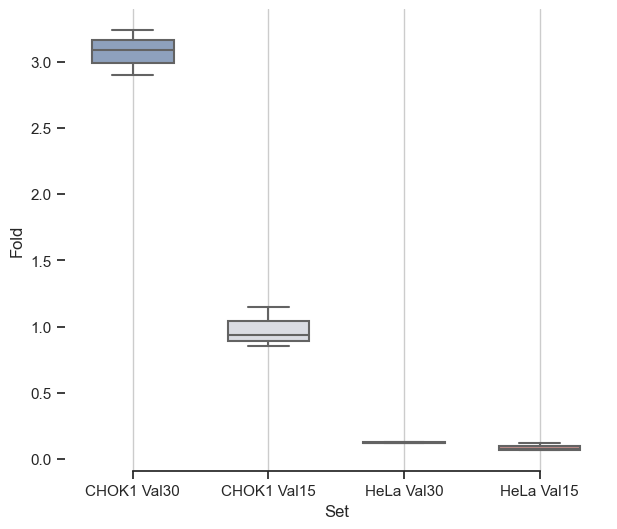

In [30]:
# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))

# Plot
sns.boxplot(
    x="Set",
    y="Fold",
    data=foldMedian,
    width=0.6,
    palette="vlag",
    showfliers=False,
)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Fold")
sns.despine(trim=True, left=True)

### Area

In [32]:
# create an Empty DataFrame object
dfArea = pd.DataFrame()

# append columns to an empty DataFrame
dfArea["Set"] = []
dfArea["Well"] = []
dfArea["Area"] = []

for i in range(0, len(df), 4):
    for l in range(1, 4, 1):
        print(
            df.iloc[i + l].Set
            + ", "
            + df.iloc[i + l].Well
            + " over "
            + df.iloc[i].Set
            + ", \t area change: \t {:.2f} %".format(
                (df.iloc[i + l].Area / df.iloc[i].Area) * 100
            )
        )
        new_row = {
            "Set": df.iloc[i + l].Set,
            "Well": df.iloc[i + l].Well,
            "Area": (df.iloc[i + l].Area / df.iloc[i].Area) * 100,
        }
        # dfArea = dfArea.append(new_row, ignore_index=True)
        dfArea.loc[len(dfArea.index)] = new_row

CHOK1 Val30, B2 over CHOK1, 	 area change: 	 41.40 %
CHOK1 Val30, C2 over CHOK1, 	 area change: 	 41.45 %
CHOK1 Val30, D2 over CHOK1, 	 area change: 	 40.05 %
CHOK1 Val15, B3 over CHOK1, 	 area change: 	 53.20 %
CHOK1 Val15, C3 over CHOK1, 	 area change: 	 51.51 %
CHOK1 Val15, D3 over CHOK1, 	 area change: 	 56.99 %
HeLa Val30, B6 over CHOK1, 	 area change: 	 97.22 %
HeLa Val30, C6 over CHOK1, 	 area change: 	 92.79 %
HeLa Val30, D6 over CHOK1, 	 area change: 	 93.57 %
HeLa Val15, B7 over CHOK1, 	 area change: 	 102.71 %
HeLa Val15, C7 over CHOK1, 	 area change: 	 102.17 %
HeLa Val15, D7 over CHOK1, 	 area change: 	 100.87 %


In [33]:
# create an Empty DataFrame object
areaIQR = pd.DataFrame()

# append columns to an empty DataFrame
areaIQR["Set"] = []
areaIQR["Area Median"] = []
areaIQR["Area IQR"] = []

print("Area:")
uSet = dfArea["Set"].unique().tolist()

for iSet in uSet:
    well_set1 = dfArea[dfArea["Set"] == iSet]
    new_row = {
        "Set": iSet,
        "Area Median": well_set1["Area"].quantile(q=0.5),
        "Area IQR": well_set1["Area"].quantile(q=0.75)
        - well_set1["Area"].quantile(q=0.25),
    }
    areaIQR.loc[len(areaIQR.index)] = new_row
    print(iSet)
    print("mean: {}".format(well_set1["Area"].quantile(q=0.5)))
    print(
        "IQR: {}".format(
            well_set1["Area"].quantile(q=0.75) - well_set1["Area"].quantile(q=0.25)
        )
    )

Area:
CHOK1 Val30
mean: 41.399567997559835
IQR: 0.6979365365485535
CHOK1 Val15
mean: 53.199383678954504
IQR: 2.739483718522358
HeLa Val30
mean: 93.56780518605724
IQR: 2.2161535805300048
HeLa Val15
mean: 102.17175090683955
IQR: 0.9194830638641065


In [34]:
areaIQR

,Set,Area Median,Area IQR
0,CHOK1 Val30,41.399568,0.697937
1,CHOK1 Val15,53.199384,2.739484
2,HeLa Val30,93.567805,2.216154
3,HeLa Val15,102.171751,0.919483


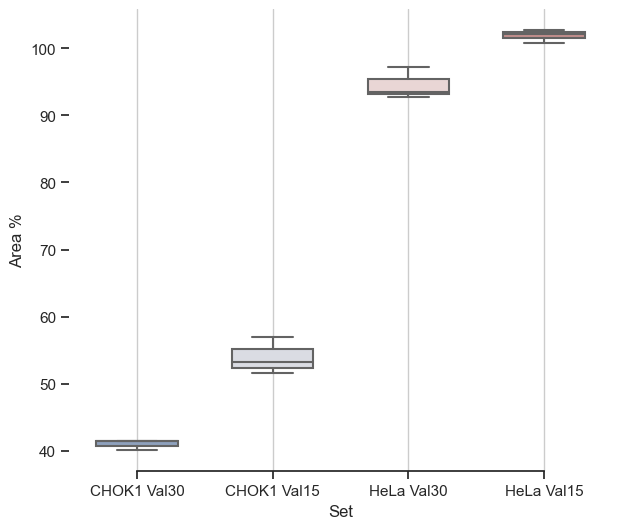

In [35]:
# Initialize the figure
f, ax = plt.subplots(figsize=(7, 6))

# Plot
sns.boxplot(
    x="Set",
    y="Area",
    data=dfArea,
    width=0.6,
    palette="vlag",
    showfliers=False,
)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Area %")
sns.despine(trim=True, left=True)

## Show all data

In [36]:
all_df = pd.DataFrame()
for s in range(len(set2t_name)):
    well_set1 = pd.DataFrame()
    well_set2 = pd.DataFrame()
    print(s)

    # get set of wells and names based on setup
    set1 = set1c
    set1_name = set1c_name
    set2 = set2t[s]
    set2_name = set2t_name[s]

    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Set_name"] = set1_name
    well_set1.Mean.describe()

    well_set2["Set"] = 2
    well_set2["Set_name"] = set2_name
    well_set2.Mean.describe()

    ## load all data to all_df
    if s == 0:
        all_df = pd.concat([well_set1, well_set2])
    else:
        all_df = pd.concat([all_df, well_set2])

0
Files and directories in ' Results_24h_final/ ' :
1
Files and directories in ' Results_24h_final/ ' :
2
Files and directories in ' Results_24h_final/ ' :
3
Files and directories in ' Results_24h_final/ ' :


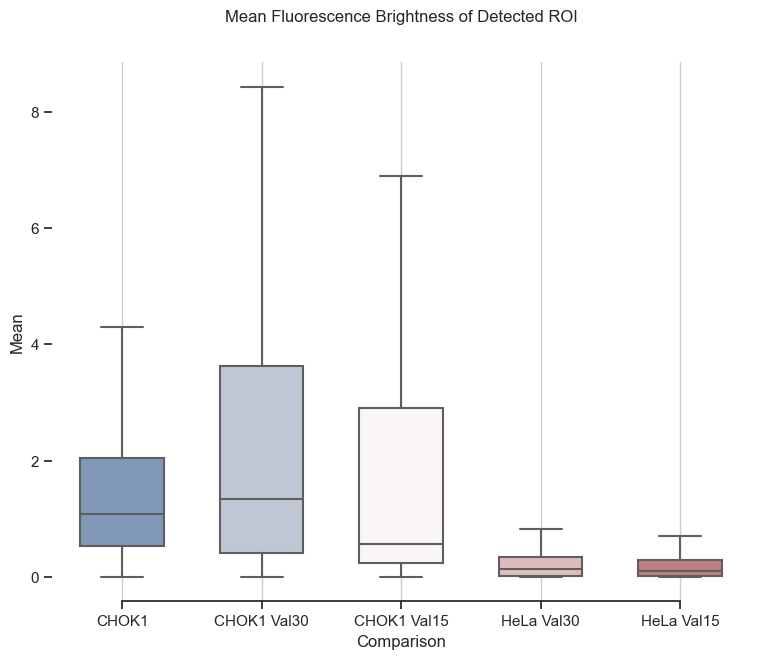

In [37]:
sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot
sns.boxplot(
    x="Set_name",
    y="Mean",
    data=all_df,
    width=0.6,
    palette="vlag",
    showfliers=False,
)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Mean")
ax.set(xlabel="Comparison")
sns.despine(trim=True, left=True)
plt.title("Mean Fluorescence Brightness of Detected ROI", y=1.06)

plt.savefig("./" + vis_name + "_boxplot.png", bbox_inches="tight")
plt.show()

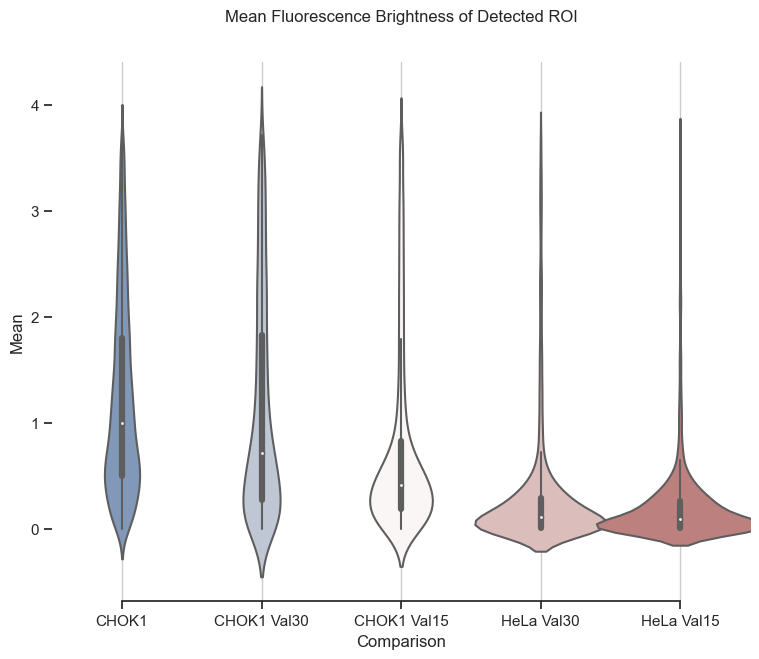

In [38]:
Q1 = all_df.Mean.quantile(0.25)
Q3 = all_df.Mean.quantile(0.75)
IQR = Q3 - Q1
cols = ["Mean"]
all_df = all_df[
    ~((all_df[cols] < (Q1 - 1.5 * IQR)) | (all_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]

sns.set_theme(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(9, 7))

# Plot
sns.violinplot(
    x="Set_name",
    y="Mean",
    data=all_df,
    width=1.2,
    palette="vlag",
    showfliers=False,
)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Mean")
ax.set(xlabel="Comparison")
sns.despine(trim=True, left=True)
plt.title("Mean Fluorescence Brightness of Detected ROI", y=1.06)
plt.savefig("./" + vis_name + "_violinplot.png", bbox_inches="tight")
plt.show()

In [39]:
watermark(iversions=True, globals_=globals())
print(watermark())

Last updated: 2023-03-13T14:58:03.665230+01:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.9.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [40]:
print(
    watermark(
        packages="watermark,numpy,pandas,seaborn,scipy,statannotations,statsmodels"
    )
)

watermark      : 2.3.1
numpy          : 1.24.1
pandas         : 1.5.3
seaborn        : 0.11.2
scipy          : 1.10.0
statannotations: 0.5.0
statsmodels    : 0.13.5

